# Challenge 2: StackOverflow

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path_files = '/home/esteban/Downloads/StackOverflow'

def search_csv():
    if os.path.isdir(path_files):
        files = os.listdir(path_files)
        return [f for f in files if f.endswith('.csv')]

def load_files(csv_files):
    for f in csv_files:
        yield pd.read_csv(f"{path_files}/{f}", encoding='latin-1')

csv_files = search_csv()
loaded_files = load_files(csv_files)

In [3]:
df_test_load = pd.read_csv(f"{path_files}/Tags.csv", encoding='latin-1')
df_test_load

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python
...,...,...
1885073,40143338,python
1885074,40143365,python
1885075,40143365,numpy
1885076,40143365,theano


In [4]:
df = pd.merge(*loaded_files, how='inner', on="Id")
df.head()

,Id,Tag,OwnerUserId,CreationDate,Score,Title,Body
0,469,python,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,469,osx,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
2,469,fonts,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
3,469,photoshop,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
4,502,python,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...


In [5]:
df.shape

(1885074, 7)

In [6]:
df.columns

Index(['Id', 'Tag', 'OwnerUserId', 'CreationDate', 'Score', 'Title', 'Body'], dtype='object')

## Top 5 Tags

In [7]:
df_tags = df.groupby('Tag').size().reset_index(name='Counts')
df_tags.sort_values(by=['Counts'], ascending=False, inplace=True)
df_tags.head()

,Tag,Counts
11723,python,607282
3622,django,62818
11730,python-2.7,34616
10476,pandas,26854
11739,python-3.x,26814


In [8]:
import re
import string

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/esteban/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
def transform(text):
    stopWord = set(stopwords.words('english'))

    words = str(text).lower().split()

    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    stripped = [re_punc.sub('', word) for word in words]
    no_garbage = [word for word in stripped if word not in stopWord]

    return " ".join(no_garbage)

In [10]:
df_unique_sample = df.drop_duplicates(['Title'])
df_unique_sample = df_unique_sample.sample(500)
df_unique_sample['Transformed'] = df_unique_sample["Title"].apply(transform)

In [11]:
df_unique_sample.head()

,Id,Tag,OwnerUserId,CreationDate,Score,Title,Body,Transformed
1402270,33574555,python,1137485.0,2015-11-06T19:48:12Z,2,Test if all instances of character in string a...,<p>I'm looking for help creating a function to...,test instances character string consecutive py...
510378,16219587,python,1344238.0,2013-04-25T16:03:08Z,0,Django and Timezones: how to render aware date...,<p>I have those models:</p>\n\n<pre><code>clas...,django timezones render aware datetime naive o...
459873,14881481,python,115751.0,2013-02-14T18:22:04Z,1,Is Python allowed to optimize a function defin...,<p>If I defined a function like this:</p>\n\n<...,python allowed optimize function definition el...
1726797,38123480,python,2665391.0,2016-06-30T12:43:54Z,0,Python subprocess call hungs when running rpm2...,<p>I'm running the below command using python ...,python subprocess call hungs running rpm2cpio
1254147,31200747,python,4751968.0,2015-07-03T07:12:19Z,1,"python,pandas do group wise value_count()",<p>I have a dataframe like this:</p>\n\n<pre><...,pythonpandas group wise valuecount


In [16]:
from wordcloud import WordCloud

text = " ".join(df_unique_sample['Transformed'])
text

error say inserting integer inserting text string devpi upload error commands supplied setuppy get create table definition mysql using python need larger image get pulled facebook user signs python ldap via ssl isnt localestrxfrmgã¨ prefix localestrxfrmgã¨ne locale frfrutf8 dynamic field calculations django call function running process python rainfall calculator suds webfault probable incorrect soapaction building complete number range wout overlaps find lazy relation isnt loaded yet sqlalchemy parse javascript instrument code django 17 makemigrations recreating 0001initialpy trying count words file using python executing printed statement add geolocation data pandas data frame try except loop qt  overlay qgraphicsview vlc video looping files pandas python pyqtgui updating gui clicked button shutilmove removing file extensions understanding asynchronous io vs asynchronous programming create simple python animation passing file contents rather filename xlrd modules openworkbook method 

In [18]:
wordcloud = WordCloud(width=1024, height=800, background_color="black", min_font_size=14)
wordcloud = wordcloud.generate(text)

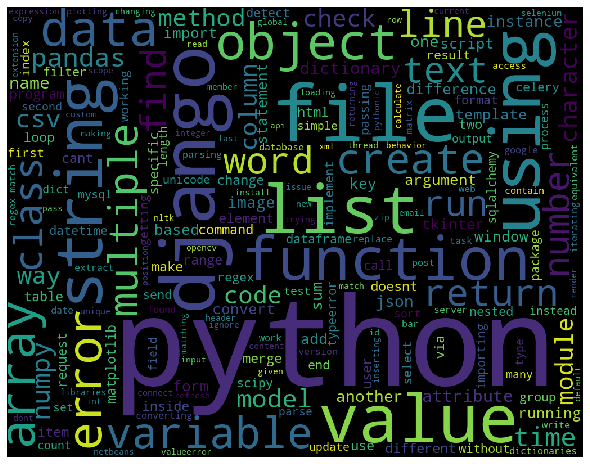

In [21]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()